42. Web Scraping con Python
---
---

PhD(s). MsC. Ing. Jonnatan Arias Garcia

jariasg@uniquindio.edu.co

jonnatan.arias@utp.edu.co

# Usando Selenium (https://www.selenium.dev/)

In [1]:
!pip install selenium
!apt update
!apt install chromium-chromedriver #maneja driver de chrome, sin necesidad de actualizarla manualmente
!pip install webdriver-manager

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:6 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:9 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Fetched 257 kB in 4s (66.5 kB/s)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
52 packages can be upgraded. Run 'apt list --upgradable' to see them.
Reading package lists... Done
Building dependen

## Imports

In [2]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager

## Configure Chrome Options

User agent (generalmente se plantea como bot, si lo cambiamos ya no sera bot

In [3]:
options = webdriver.ChromeOptions()
options.add_argument('--headless') #sin interfaz grafica
options.add_argument('--no-sandbox') #desactiva la capa de permisos rendimiento reducciendo la seguridad
options.add_argument('--disable-dev-shm-usage') #desactiva el uso compartido de memoria, reemplazando memoria temporar del navegador al disco


# Define a custom user agent
my_user_agent = "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/92.0.4515.159 Safari/537.36"
# Set the custom User-Agent
options.add_argument(f"--user-agent={my_user_agent}")



dr = webdriver.Chrome(options=options, )
                      #service=Service(ChromeDriverManager().install()))

## Import WebSite to scraping

In [4]:
dr.get("https://www.airbnb.com/") # Website used for scraping

#Displaying the title of the website in this case I had used GFG's Website
print(dr.title,"\n")

#Displaying some GFG's Articles
c=1
for i in dr.find_elements(By.CLASS_NAME,'gfg_home_page_article_meta'):
  print(str(c)+". ",i.text)
  c += 1

#quitting the browser
dr.quit()

Airbnb | Vacation rentals, cabins, beach houses, & more 



# Extraigamos nombres de los lugares de airbnb


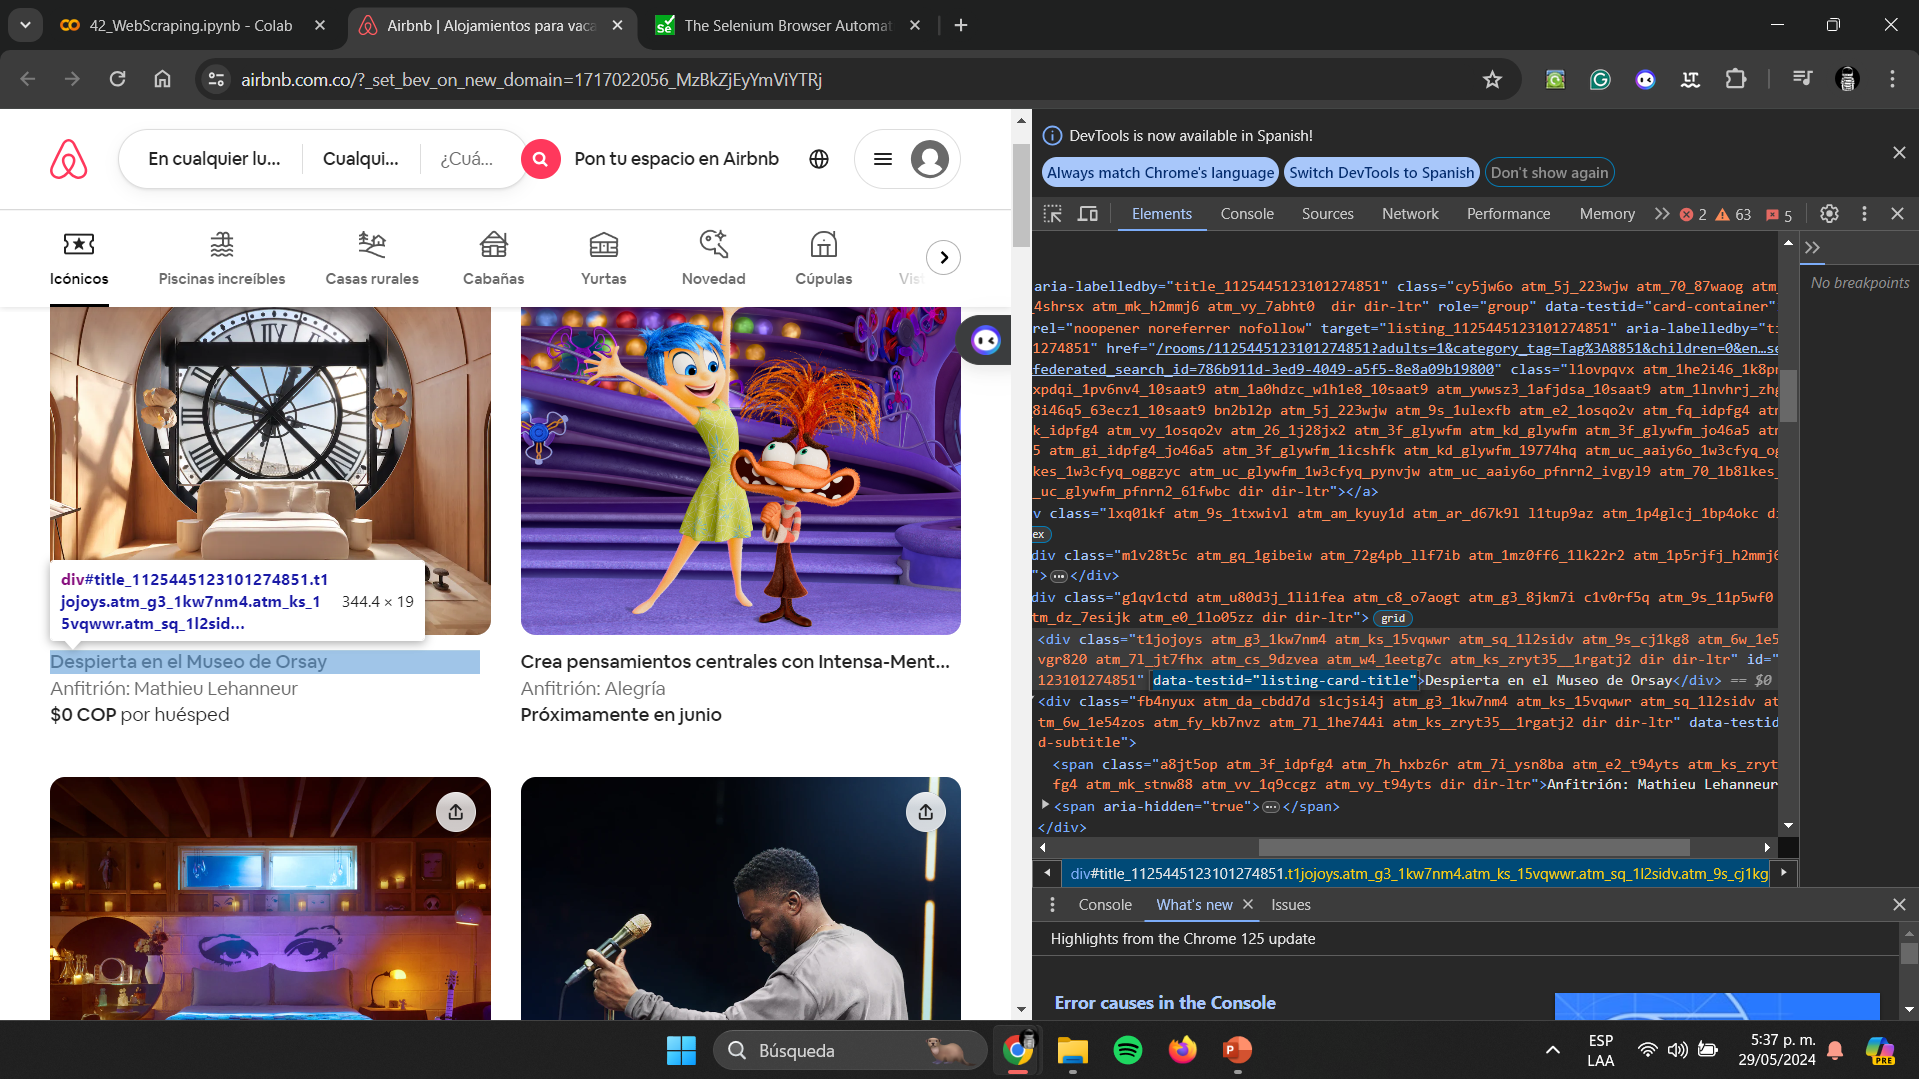

In [7]:
options = webdriver.ChromeOptions()
options.add_argument('--headless') #sin interfaz grafica
options.add_argument('--no-sandbox') #desactiva la capa de permisos rendimiento reducciendo la seguridad
options.add_argument('--disable-dev-shm-usage') #desactiva el uso compartido de memoria, reemplazando memoria temporar del navegador al disco


# Define a custom user agent
my_user_agent = "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/92.0.4515.159 Safari/537.36"
# Set the custom User-Agent
options.add_argument(f"--user-agent={my_user_agent}")



dr = webdriver.Chrome(options=options, )
                      #service=Service(ChromeDriverManager().install()))


dr.get("https://www.airbnb.com.co/") # Website used for scraping

titulos = dr.find_elements(By.XPATH, '//div[@data-testid="listing-card-title"]')
for titulo in titulos:
    print(titulo.text)

#quitting the browser
dr.quit()

Despierta en el Museo de Orsay


In [8]:
titulos

[<selenium.webdriver.remote.webelement.WebElement (session="639994ddaaa904cc72a9c6a613bc3ffc", element="f.5A54D2FA4CE23BE5AFC87EED3F59AE53.d.50A1A5762661CBDE36F094D2496C0D43.e.33")>]

# Usando beautifoul-soup

In [9]:
!pip install requests beautifulsoup4

In [19]:
import requests
from bs4 import BeautifulSoup

# URL de la página que quieres hacer scraping
url = "https://www.airbnb.com.co/"

# Realizar una solicitud HTTP GET a la URL
response = requests.get(url)

# Verificar que la solicitud fue exitosa
if response.status_code == 200:
    # Analizar el contenido HTML de la página con BeautifulSoup
    soup = BeautifulSoup(response.content, 'html.parser')

    # Encontrar todos los elementos que contienen información sobre las propiedades
    properties = soup.find_all(attrs={"data-testid": "listing-card-title"})

    # Iterar sobre cada elemento de propiedad y extraer la información deseada
    for property in properties:
        titulos = print(property.text.strip())

else:
    print(f"Failed to retrieve the page. Status code: {response.status_code}")

Despierta en el Museo de Orsay
Crea pensamientos centrales con Intensa-Mente 2
Quédate en la casa de Purple Rain de Prince
Noche VIP con Kevin Hart
Una sesión exclusiva con Doja
Diseña tu supertraje de Los Increíbles
Quédate en la Mansión X
Ponte en los zapatos de Janhvi Kapoor
Entrena en la Mansión X
Vete de gira con Feid
Juega con Khaby Lame
Aventura de altura en la casa de Up
Pasa la noche en el Museo Ferrari
El pantano de Shrek
Casa de los Sueños de Barbie en Malibú, al estilo Ken
El pub favorito de Ted Lasso
Un retiro al estilo Houseplant
De vacaciones con Mi pobre angelito
La última tienda de Blockbuster


In [20]:
properties

[<div class="t1jojoys atm_g3_1kw7nm4 atm_ks_15vqwwr atm_sq_1l2sidv atm_9s_cj1kg8 atm_6w_1e54zos atm_fy_1vgr820 atm_7l_jt7fhx atm_cs_9dzvea atm_w4_1eetg7c atm_ks_zryt35__1rgatj2 dir dir-ltr" data-testid="listing-card-title" id="title_1125445123101274851">Despierta en el Museo de Orsay</div>,
 <div class="t1jojoys atm_g3_1kw7nm4 atm_ks_15vqwwr atm_sq_1l2sidv atm_9s_cj1kg8 atm_6w_1e54zos atm_fy_1vgr820 atm_7l_jt7fhx atm_cs_9dzvea atm_w4_1eetg7c atm_ks_zryt35__1rgatj2 dir dir-ltr" data-testid="listing-card-title" id="title_1131083523992770597">Crea pensamientos centrales con Intensa-Mente 2</div>,
 <div class="t1jojoys atm_g3_1kw7nm4 atm_ks_15vqwwr atm_sq_1l2sidv atm_9s_cj1kg8 atm_6w_1e54zos atm_fy_1vgr820 atm_7l_jt7fhx atm_cs_9dzvea atm_w4_1eetg7c atm_ks_zryt35__1rgatj2 dir dir-ltr" data-testid="listing-card-title" id="title_1131089498040701183">Quédate en la casa de Purple Rain de Prince</div>,
 <div class="t1jojoys atm_g3_1kw7nm4 atm_ks_15vqwwr atm_sq_1l2sidv atm_9s_cj1kg8 atm_6w_1e54zo